<a href="https://colab.research.google.com/github/raqcrisb/Project_Aula05_raqcrisb/blob/main/C%C3%B3pia_de_first_project_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instale os pacotes necessários caso não existam.

In [ ]:
!apt-get install numpy
!apt-get install matplotlib
!apt-get install pandas
!apt-get install sklearn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package numpy
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package matplotlib
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package pandas
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package sklearn


Importe os pacotes necessários.

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd

print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
scipy: 1.14.1
numpy: 2.0.2
matplotlib: 3.10.0
pandas: 2.2.2
sklearn: 1.6.1


Configure o google colab para carregar arquivos locais do google drive.

In [ ]:
# carrega as biblioteca de
#montagem de driver
from google.colab import drive
# montar Google Drive
# serao solicitadas as credenciais do usuario
# do gmail
drive.mount('/drive')
# podemos invocar comandos no sistema operacional usando o caractere !
#listar arquivos do diretório atual(/gdrive)
!ls
#mostrar arquivos da pasta conhecimento
#ir para pasta conhecimento
path = 'drive/MyDrive/Projetos no Google Colab/dataset/iris.csv'

Mounted at /drive
drive  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load do dataset

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(path, names=names)

Dimensions Dataset.

In [ ]:
# shape
print(dataset.shape)
# head
print(dataset.head(20))

(149, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            4.9          3.0           1.4          0.2  Iris-setosa
1            4.7          3.2           1.3          0.2  Iris-setosa
2            4.6          3.1           1.5          0.2  Iris-setosa
3            5.0          3.6           1.4          0.2  Iris-setosa
4            5.4          3.9           1.7          0.4  Iris-setosa
5            4.6          3.4           1.4          0.3  Iris-setosa
6            5.0          3.4           1.5          0.2  Iris-setosa
7            4.4          2.9           1.4          0.2  Iris-setosa
8            4.9          3.1           1.5          0.1  Iris-setosa
9            5.4          3.7           1.5          0.2  Iris-setosa
10           4.8          3.4           1.6          0.2  Iris-setosa
11           4.8          3.0           1.4          0.1  Iris-setosa
12           4.3          3.0           1.1          0.1  Iris-setosa
13         

Statistical Summary

In [ ]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Class distribution

In [ ]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Univariate Plots

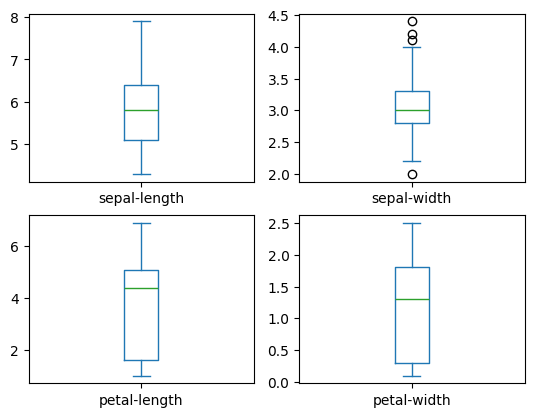

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Plot histogram

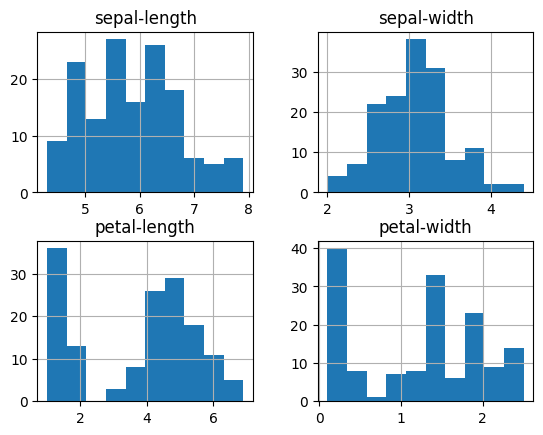

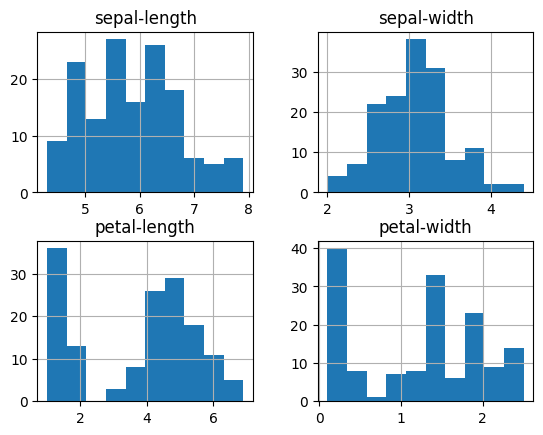

In [ ]:
# histograms
dataset.hist()
pyplot.show()

# histograms
dataset.hist()
pyplot.show()

Multivariate Plots

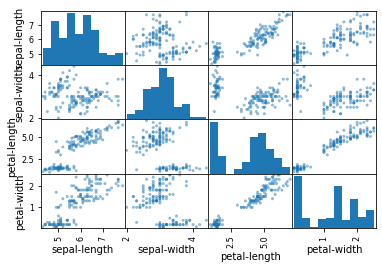

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

Split dataset.

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Build Models

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.940909 (0.075286)
LDA: 0.975000 (0.053359)
KNN: 0.958333 (0.055902)
CART: 0.940909 (0.053761)
NB: 0.958333 (0.076830)
SVM: 0.975000 (0.053359)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre